In [3]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd
import datetime
import xarray as xr
from salishsea_tools import tidetools, geo_tools, viz_tools
from matplotlib.colors import LinearSegmentedColormap
import os
import h5py
import glob
import matplotlib.patches as mpatches
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [5]:
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
bathy, X, Y = tidetools.get_bathy_data(grid)

In [22]:
vmax = 1.0
cmap = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'tab:pink'),
                                                    (0.3 / vmax, 'tab:pink'),
                                                    (0.30001 / vmax, 'tab:red'),
                                                    (0.55 / vmax, 'tab:red'),
                                                    (0.550001 / vmax, 'tab:green'),
                                                    (0.85 / vmax, 'tab:green'),
                                                    (0.850001 / vmax, 'tab:blue'),
                                                    (1 / vmax, 'tab:blue')]
                                        )

green_patch = mpatches.Patch(color='tab:pink', label='1/4 runs')
red_patch = mpatches.Patch(color='tab:red', label='2/4 runs')
yellow_patch = mpatches.Patch(color='tab:green', label='3/4 runs')
blue_patch = mpatches.Patch(color='tab:blue', label='4/4 runs')

In [20]:
cmap2 = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'lightskyblue'),
                                                    (0.85 / vmax, 'lightskyblue'),
                                                    (0.850001 / vmax, 'burlywood'),
                                                    (1 / vmax, 'burlywood')]
                                        )

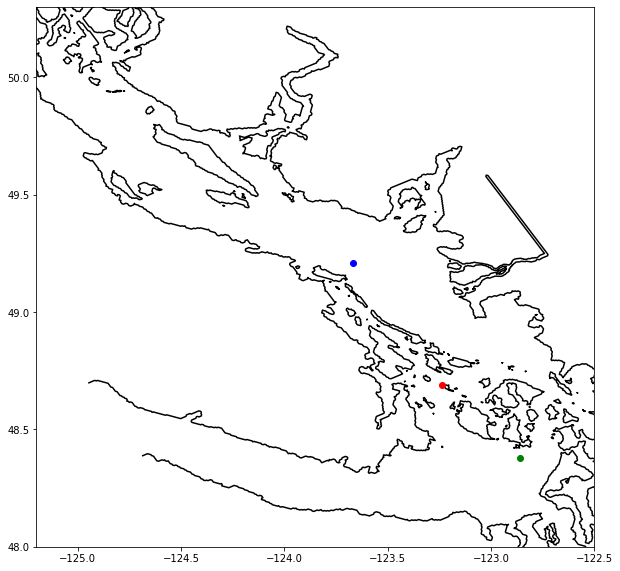

In [8]:
fig, ax = plt.subplots(figsize = (10,10))
viz_tools.plot_coastline(ax, grid, coords = 'map')
ax.plot(-123.24, 48.69, 'ro')
ax.plot(-123.67, 49.21, 'bo')
ax.plot(-122.86, 48.38, 'go')
ax.set_ylim(48, 50.3)
ax.set_xlim(-125.2, -122.5)
viz_tools.set_aspect(ax, coords = 'map');

In [18]:
def make_plots(f0,f1,f2,f3, x1lim, y1lim, y2lim, y3lim):
    #print sum of beaching hours
    print('total beaching hours for f0 = ' + str(f0['Beaching_Time'][:,:].sum()))
    print('total beaching hours for f1 = ' + str(f1['Beaching_Time'][:,:].sum()))
    print('total beaching hours for f2 = ' + str(f2['Beaching_Time'][:,:].sum()))
    print('total beaching hours for f3 = ' + str(f3['Beaching_Time'][:,:].sum()))
    
    fig, ax = plt.subplots(2,2, figsize = (15,10))
    for a in ax.flatten():
        a.pcolormesh(bathy.mask[1:-1, 1:-1], cmap = cmap2)
    ax[0,0].set_title("2015")
    ax[0,1].set_title("2016")
    ax[1,0].set_title("2017")
    ax[1,1].set_title("2018")
    ax[0,0].pcolormesh(np.ma.masked_equal(f0['Beaching_Time'][:,:], 0), vmin = 0, vmax = 168)
    ax[0,1].pcolormesh(np.ma.masked_equal(f1['Beaching_Time'][:,:], 0), vmin = 0, vmax = 168)
    ax[1,0].pcolormesh(np.ma.masked_equal(f2['Beaching_Time'][:,:], 0), vmin = 0, vmax = 168)
    mesh = ax[1,1].pcolormesh(np.ma.masked_equal(f3['Beaching_Time'][:,:], 0), vmin = 0, vmax = 168)
    fig.colorbar(mesh, ax=ax[1,1])
    for a in ax.flatten():
        viz_tools.set_aspect(a)
        a.set_xlim(x1lim)
        a.set_ylim(y1lim)
    
    #make probability arrays
    f0lessthanone = f0['Beaching_Time'][:,:]
    f0lessthanone[(f0lessthanone <= 24) & (f0lessthanone > 0)] = 1
    f0lessthanone[(f0lessthanone > 24) | (f0lessthanone == 0)] = 0

    f1lessthanone = f1['Beaching_Time'][:,:]
    f1lessthanone[(f1lessthanone <= 24) & (f1lessthanone > 0)] = 1
    f1lessthanone[(f1lessthanone > 24) | (f1lessthanone == 0)] = 0

    f2lessthanone = f2['Beaching_Time'][:,:]
    f2lessthanone[(f2lessthanone <= 24) & (f2lessthanone > 0)] = 1
    f2lessthanone[(f2lessthanone > 24) | (f2lessthanone == 0)] = 0

    f3lessthanone = f3['Beaching_Time'][:,:]
    f3lessthanone[(f3lessthanone <= 24) & (f3lessthanone > 0)] = 1
    f3lessthanone[(f3lessthanone > 24) | (f3lessthanone == 0)] = 0

    problessthanone = (f0lessthanone+f1lessthanone+f2lessthanone+f3lessthanone)/4

    f0lessthanthree = f0['Beaching_Time'][:,:]
    f0lessthanthree[(f0lessthanthree <= 72) & (f0lessthanthree > 0)] = 1
    f0lessthanthree[(f0lessthanthree > 72) | (f0lessthanthree == 0)] = 0

    f1lessthanthree = f1['Beaching_Time'][:,:]
    f1lessthanthree[(f1lessthanthree <= 72) & (f1lessthanthree > 0)] = 1
    f1lessthanthree[(f1lessthanthree > 72) | (f1lessthanthree == 0)] = 0

    f2lessthanthree = f2['Beaching_Time'][:,:]
    f2lessthanthree[(f2lessthanthree <= 72) & (f2lessthanthree > 0)] = 1
    f2lessthanthree[(f2lessthanthree > 72) | (f2lessthanthree == 0)] = 0

    f3lessthanthree = f3['Beaching_Time'][:,:]
    f3lessthanthree[(f3lessthanthree <= 72) & (f3lessthanthree > 0)] = 1
    f3lessthanthree[(f3lessthanthree > 72) | (f3lessthanthree == 0)] = 0

    problessthanthree = (f0lessthanthree+f1lessthanthree+f2lessthanthree+f3lessthanthree)/4

    f0lessthanseven = f0['Beaching_Time'][:,:]
    f0lessthanseven[(f0lessthanseven <= 168) & (f0lessthanseven > 0)] = 1
    f0lessthanseven[(f0lessthanseven > 168) | (f0lessthanseven == 0)] = 0

    f1lessthanseven = f1['Beaching_Time'][:,:]
    f1lessthanseven[(f1lessthanseven <= 168) & (f1lessthanseven > 0)] = 1
    f1lessthanseven[(f1lessthanseven > 168) | (f1lessthanseven == 0)] = 0

    f2lessthanseven = f2['Beaching_Time'][:,:]
    f2lessthanseven[(f2lessthanseven <= 168) & (f2lessthanseven > 0)] = 1
    f2lessthanseven[(f2lessthanseven > 168) | (f2lessthanseven == 0)] = 0

    f3lessthanseven = f3['Beaching_Time'][:,:]
    f3lessthanseven[(f3lessthanseven <= 168) & (f3lessthanseven > 0)] = 1
    f3lessthanseven[(f3lessthanseven > 168) | (f3lessthanseven == 0)] = 0

    problessthanseven = (f0lessthanseven+f1lessthanseven+f2lessthanseven+f3lessthanseven)/4
    
    fig, ax = plt.subplots(1,3, figsize = (20,20))

    for a in ax:
        a.pcolormesh(bathy.mask[1:-1, 1:-1], cmap = cmap2)
    
    ax[0].pcolormesh(np.ma.masked_equal(problessthanone,0), vmin = 0, vmax = 1, cmap = cmap)
    ax[1].pcolormesh(np.ma.masked_equal(problessthanthree,0), vmin = 0, vmax = 1, cmap = cmap)
    ax[2].pcolormesh(np.ma.masked_equal(problessthanseven,0), vmin = 0, vmax = 1, cmap = cmap)

    ax[0].set_title('< 1 day')
    ax[1].set_title('< 3 day')
    ax[2].set_title('< 7 day')
    
    plt.legend(handles=[green_patch, red_patch, yellow_patch, blue_patch], 
           bbox_to_anchor=(1.05, 1), loc='upper left')
    
    for a in ax:
        viz_tools.set_aspect(a)
        a.set_ylim(y1lim);
        a.set_xlim(x1lim);
        
    bins = np.arange(0,8)
    fig, ax = plt.subplots(2,2, figsize = (15,10))
    ax[0,0].set_title("2015")
    ax[0,1].set_title("2016")
    ax[1,0].set_title("2017")
    ax[1,1].set_title("2018")
    ax[0,0].hist(f0['Beaching_Time'][:,:].flatten()[f0['Beaching_Time'][:,:].flatten() !=0]/24, bins=bins)
    ax[0,1].hist(f1['Beaching_Time'][:,:].flatten()[f1['Beaching_Time'][:,:].flatten() !=0]/24, bins=bins)
    ax[1,0].hist(f2['Beaching_Time'][:,:].flatten()[f2['Beaching_Time'][:,:].flatten() !=0]/24, bins=bins)
    ax[1,1].hist(f3['Beaching_Time'][:,:].flatten()[f3['Beaching_Time'][:,:].flatten() !=0]/24, 
                 bins=bins)
    for a in ax.flatten():
        a.set_ylim(0,y2lim)
        a.set_xlabel('days')
        
    fig, ax = plt.subplots(2,2, figsize = (15,10))
    ax[0,0].set_title("2015")
    ax[0,1].set_title("2016")
    ax[1,0].set_title("2017")
    ax[1,1].set_title("2018")
    ax[0,0].hist(f0['Beaching_Time'][:,:].flatten()[f0['Beaching_Time'][:,:].flatten() !=0]/24, 
                 bins=bins, cumulative = True)
    ax[0,1].hist(f1['Beaching_Time'][:,:].flatten()[f1['Beaching_Time'][:,:].flatten() !=0]/24, 
                 bins=bins, cumulative = True)
    ax[1,0].hist(f2['Beaching_Time'][:,:].flatten()[f2['Beaching_Time'][:,:].flatten() !=0]/24, 
                 bins=bins, cumulative = True)
    ax[1,1].hist(f3['Beaching_Time'][:,:].flatten()[f3['Beaching_Time'][:,:].flatten() !=0]/24, 
                 bins=bins, cumulative = True)
    for a in ax.flatten():
        a.set_ylim(0,y3lim)
        a.set_xlabel('days');

# Turn Point with low winds

total beaching hours for f0 = 23672
total beaching hours for f1 = 12964
total beaching hours for f2 = 15228
total beaching hours for f3 = 14440


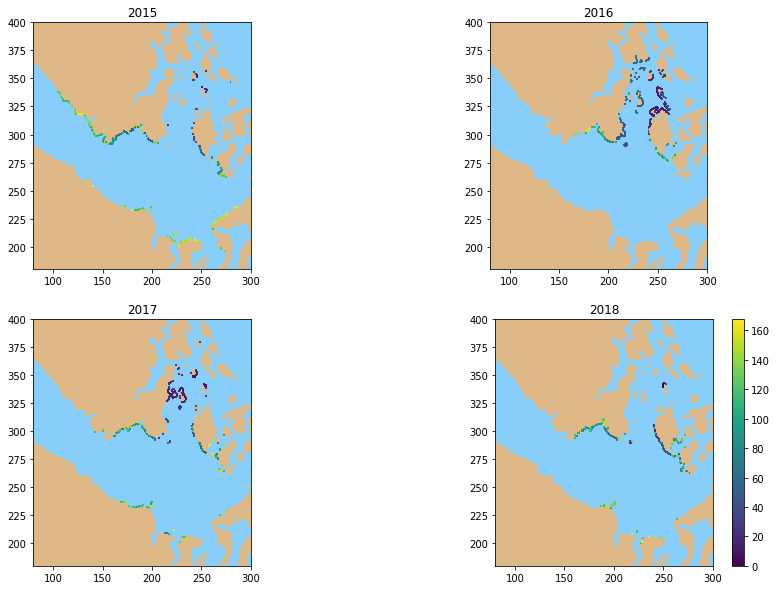

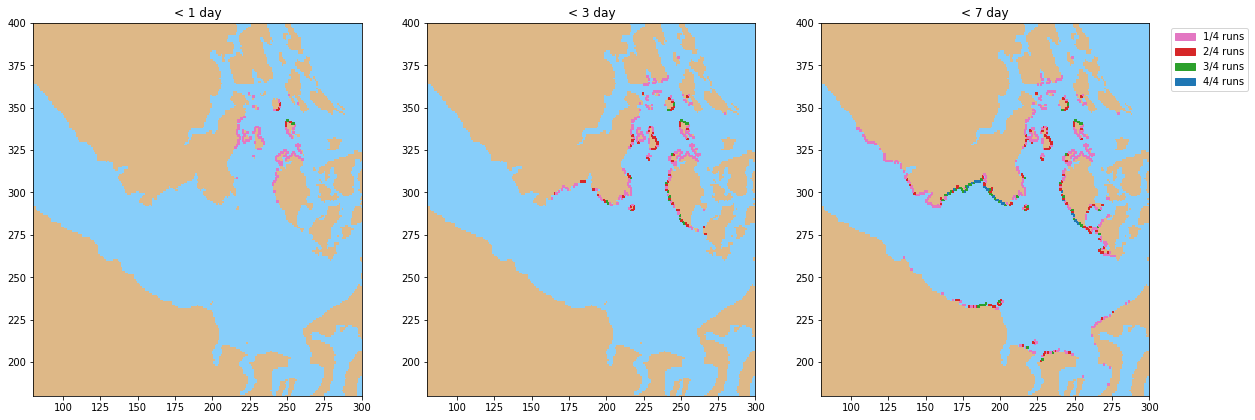

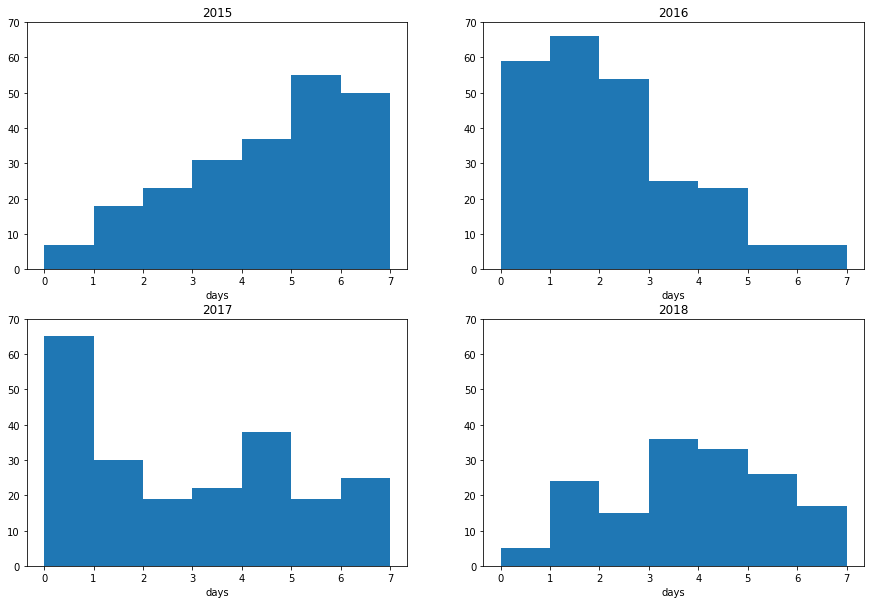

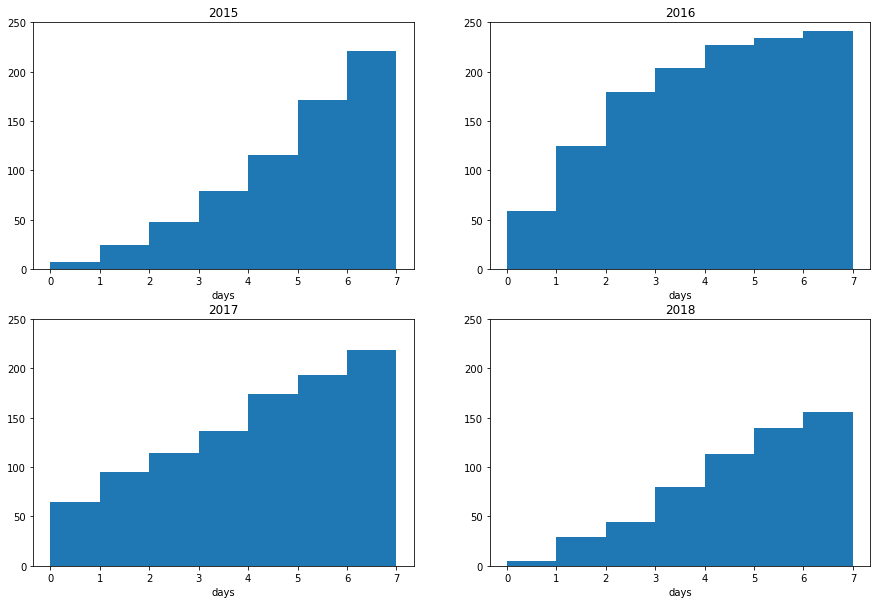

In [23]:
f0 = nc.Dataset('/ocean/vdo/MIDOSS/results/winds/Lagrangian_AKNS_crude-0_TP_low-0.nc')
f1 = nc.Dataset('/ocean/vdo/MIDOSS/results/winds/Lagrangian_AKNS_crude-1_TP_low-1.nc')
f2 = nc.Dataset('/ocean/vdo/MIDOSS/results/winds/Lagrangian_AKNS_crude-2_TP_low-2.nc')
f3 = nc.Dataset('/ocean/vdo/MIDOSS/results/winds/Lagrangian_AKNS_crude-3_TP_low-3.nc')
make_plots(f0, f1, f2, f3, (80,300), (180,400), 70, 250)

# Turn Point with high winds

total beaching hours for f0 = 1205
total beaching hours for f1 = 6006
total beaching hours for f2 = 3310
total beaching hours for f3 = 325


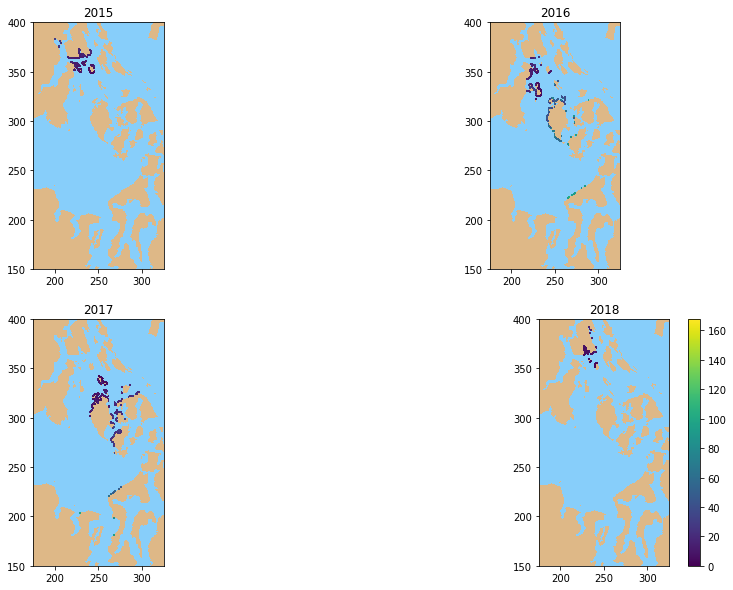

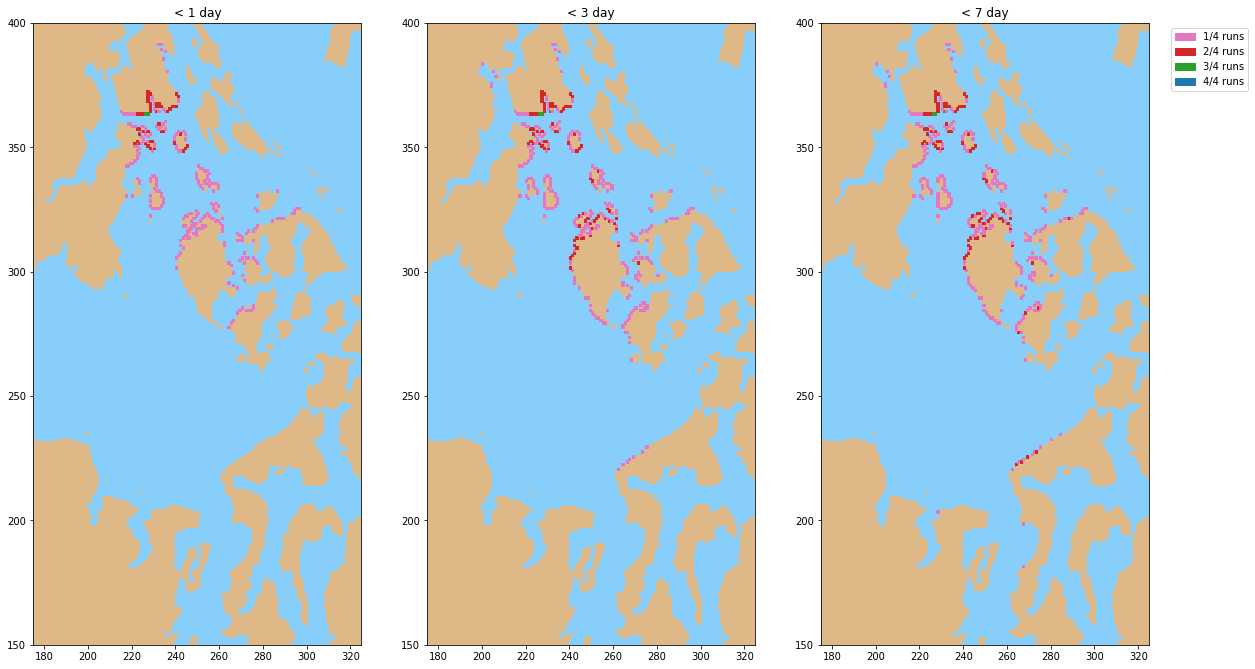

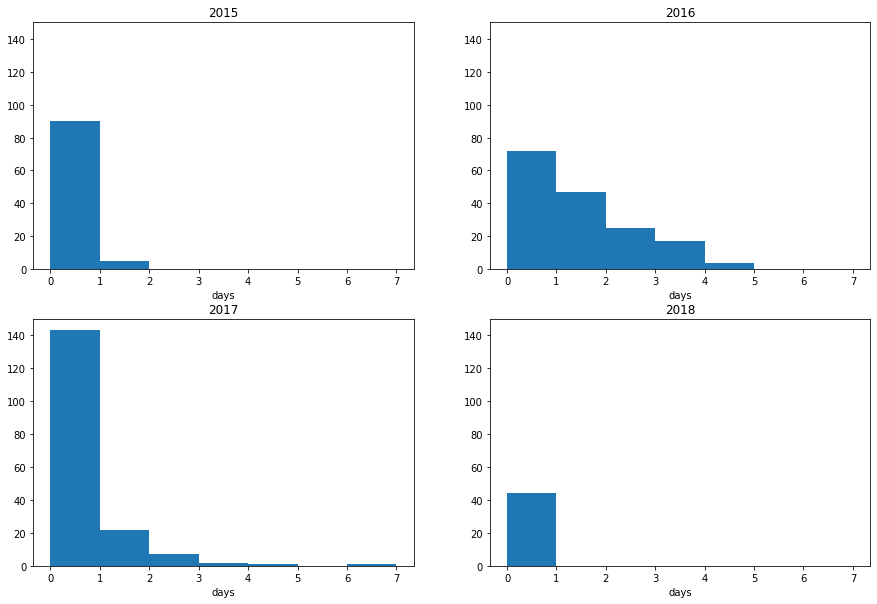

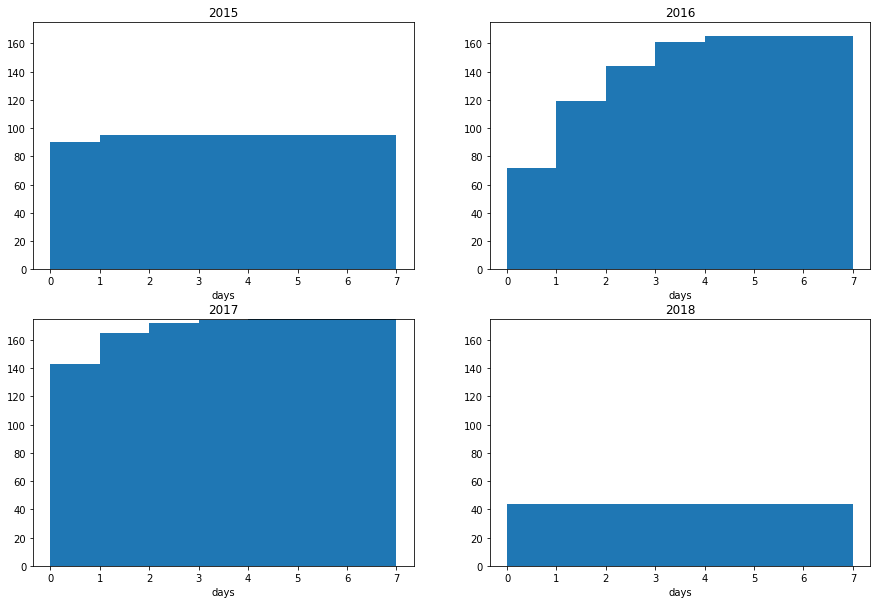

In [24]:
f0 = nc.Dataset('/ocean/vdo/MIDOSS/results/winds/Lagrangian_AKNS_crude-0_TP_high-0.nc')
f1 = nc.Dataset('/ocean/vdo/MIDOSS/results/winds/Lagrangian_AKNS_crude-1_TP_high-1.nc')
f2 = nc.Dataset('/ocean/vdo/MIDOSS/results/winds/Lagrangian_AKNS_crude-2_TP_high-2.nc')
f3 = nc.Dataset('/ocean/vdo/MIDOSS/results/winds/Lagrangian_AKNS_crude-3_TP_high-3.nc')
make_plots(f0, f1, f2, f3, (175,325), (150,400), 150, 175)

# SOG with low winds

total beaching hours for f0 = 9476
total beaching hours for f1 = 6530
total beaching hours for f2 = 21223
total beaching hours for f3 = 25896


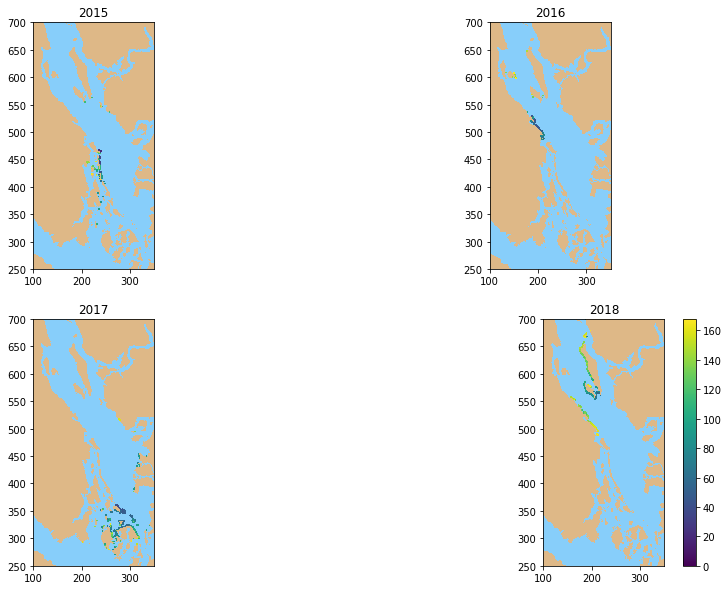

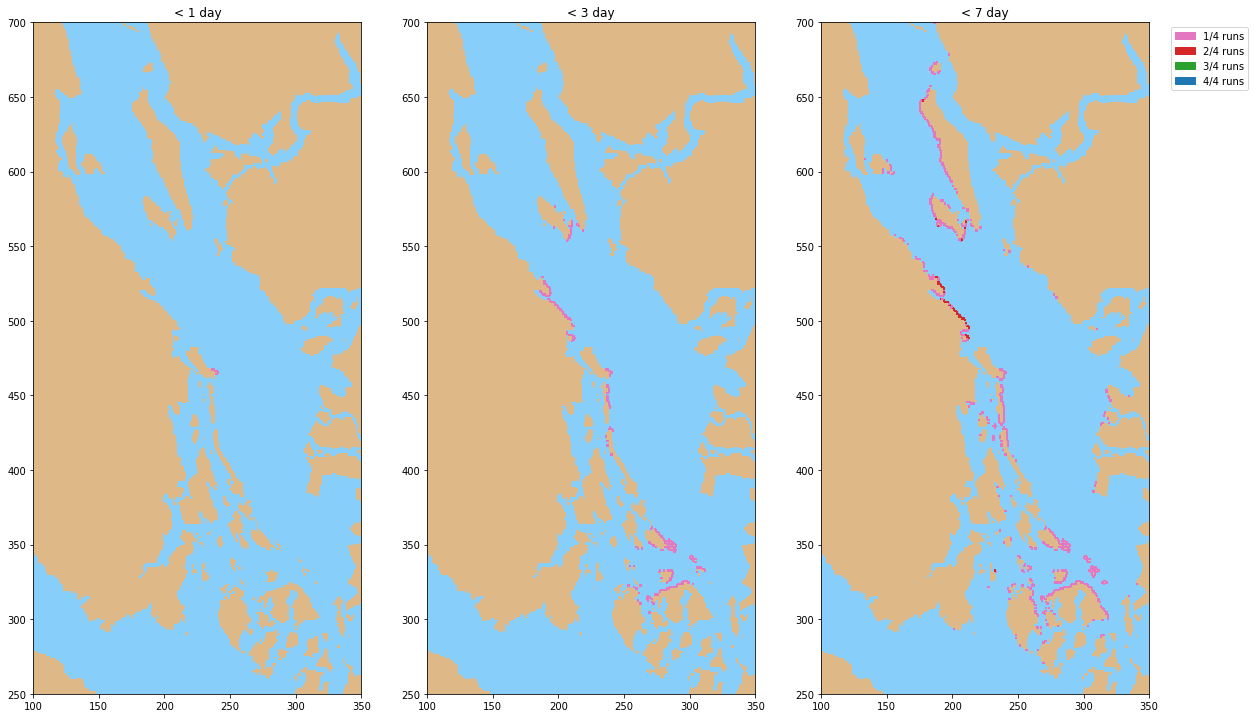

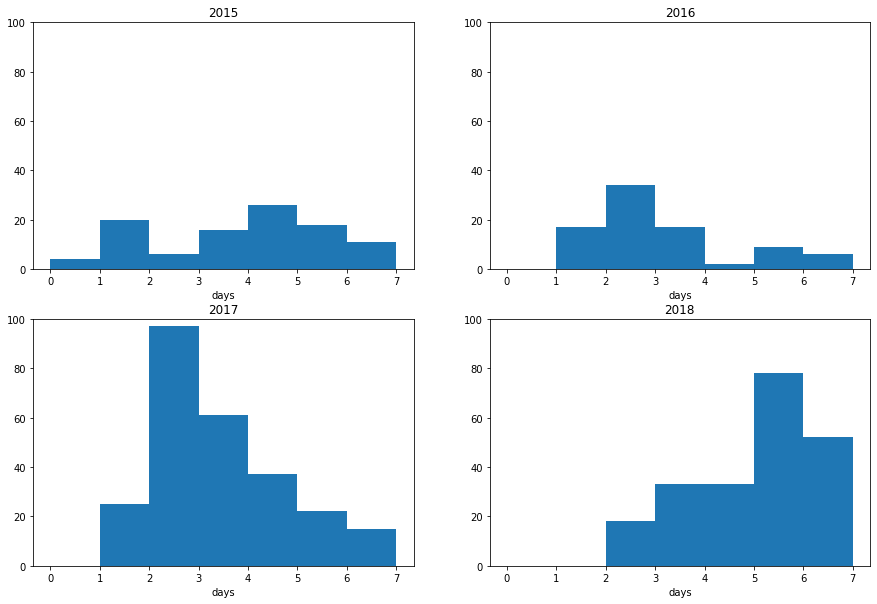

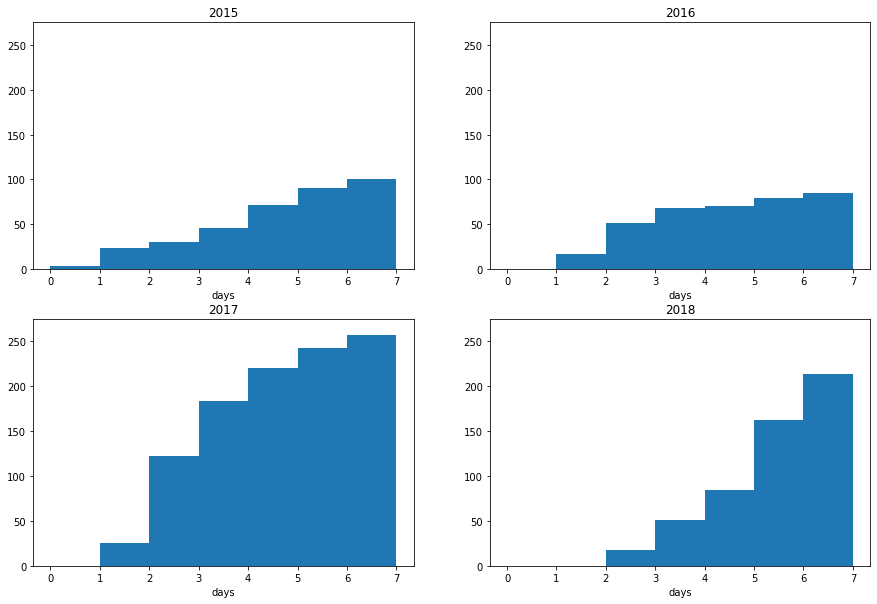

In [25]:
f0 = nc.Dataset('/ocean/vdo/MIDOSS/results/winds/Lagrangian_AKNS_crude-0_SOG_low-0.nc')
f1 = nc.Dataset('/ocean/vdo/MIDOSS/results/winds/Lagrangian_AKNS_crude-1_SOG_low-1.nc')
f2 = nc.Dataset('/ocean/vdo/MIDOSS/results/winds/Lagrangian_AKNS_crude-2_SOG_low-2.nc')
f3 = nc.Dataset('/ocean/vdo/MIDOSS/results/winds/Lagrangian_AKNS_crude-3_SOG_low-3.nc')
make_plots(f0, f1, f2, f3, (100,350), (250,700), 100, 275)

# SOG with high winds

total beaching hours for f0 = 21711
total beaching hours for f1 = 2736
total beaching hours for f2 = 5522
total beaching hours for f3 = 8735


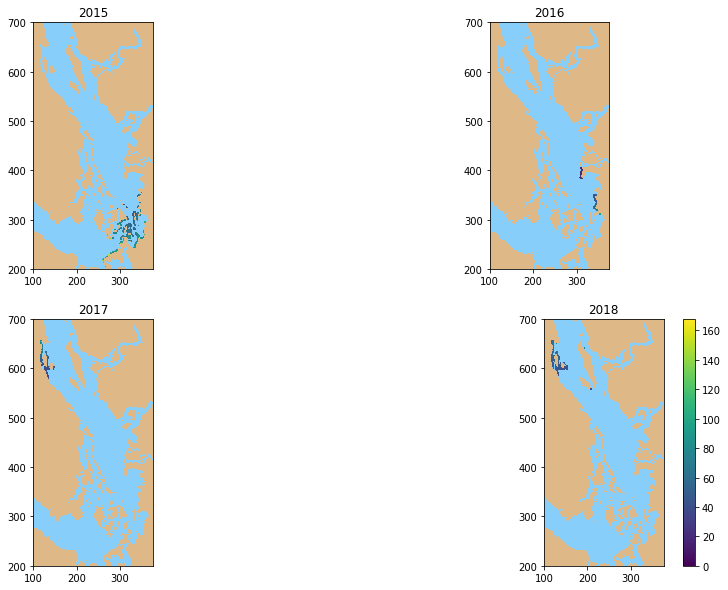

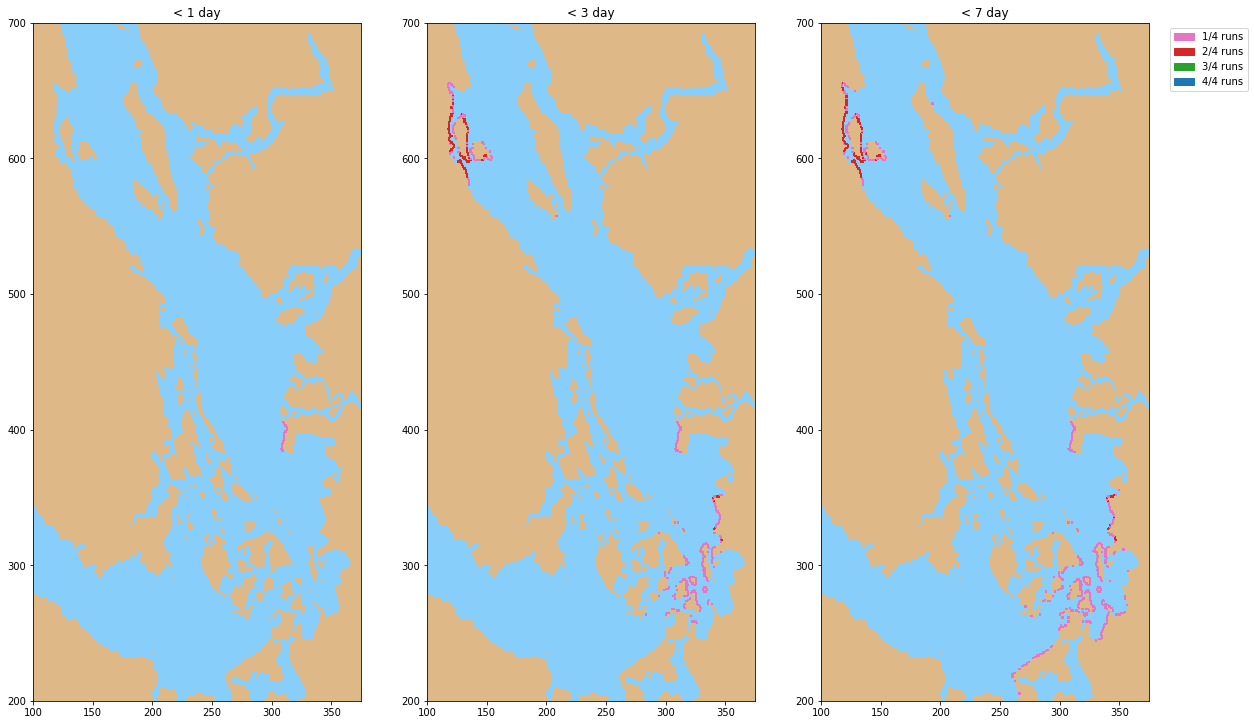

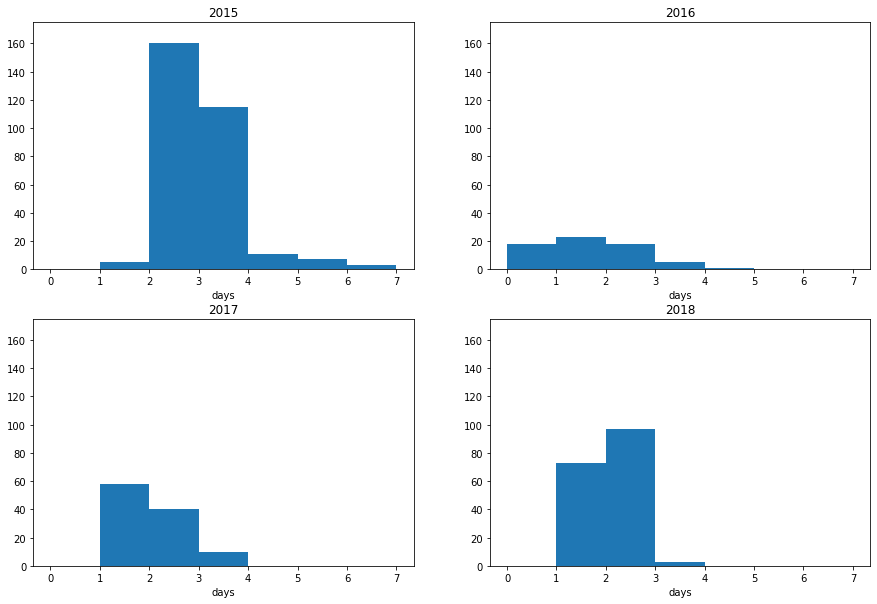

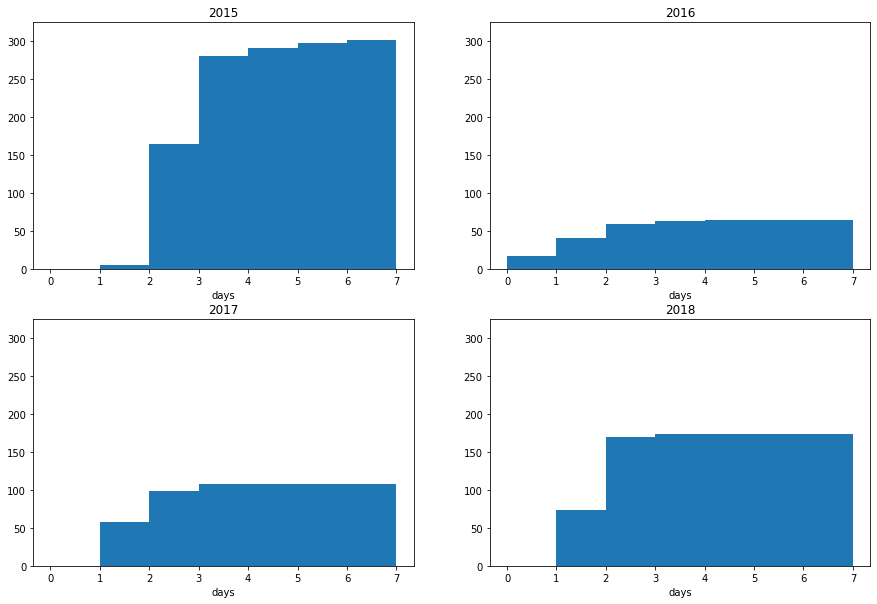

In [26]:
f0 = nc.Dataset('/ocean/vdo/MIDOSS/results/winds/Lagrangian_AKNS_crude-0_SOG_high-0.nc')
f1 = nc.Dataset('/ocean/vdo/MIDOSS/results/winds/Lagrangian_AKNS_crude-1_SOG_high-1.nc')
f2 = nc.Dataset('/ocean/vdo/MIDOSS/results/winds/Lagrangian_AKNS_crude-2_SOG_high-2.nc')
f3 = nc.Dataset('/ocean/vdo/MIDOSS/results/winds/Lagrangian_AKNS_crude-3_SOG_high-3.nc')
make_plots(f0, f1, f2, f3, (100,375), (200,700), 175, 325)